<a href="https://colab.research.google.com/github/fitocuan/CE888_2020/blob/master/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):

	x = np.zeros((n_iterations,sample_size))
	
	for i in range(0,n_iterations):
		x[i,:] = np.array([np.random.choice(sample,sample_size,replace = True )])

	mean = np.mean(x ,axis = 1)
 
	sort = np.sort(mean)
	lower = np.percentile(sort,2.5)	
	upper = np.percentile(sort,97.5)
	data_mean = np.mean(mean)


	# <---INSERT YOUR CODE HERE--->
	return data_mean, lower, upper

m,l,u = boostrap_mean(data, 10, 10)



(0, 100000)

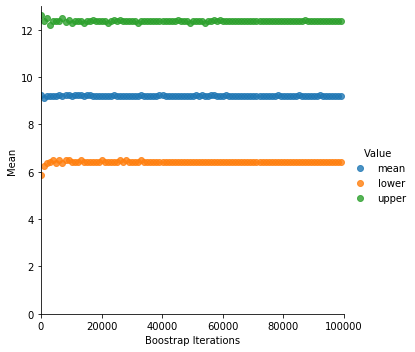

In [43]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	# <---INSERT YOUR CODE HERE--->	
	x = np.zeros((n_iterations,sample_size))
	
	for i in range(0,n_iterations):
		x[i,:] = np.array([np.random.choice(sample,sample_size,replace = True )])


	mean = np.mean(x ,axis = 1)
 
	sort = np.sort(mean)
	lower = np.percentile(sort,100-ci)	
	upper = np.percentile(sort,ci)
	data_mean = np.mean(mean)
 
	return data_mean, lower, upper

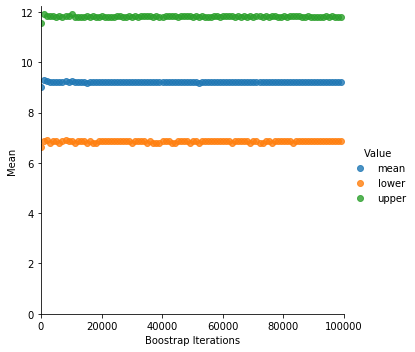

In [50]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
Current fleet    249 non-null int64
New Fleet        79 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB
None


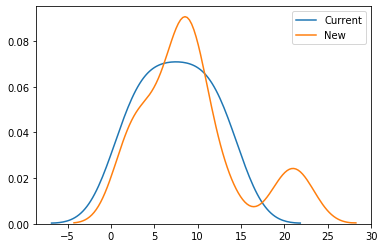

In [95]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots

df_2 = pd.read_csv("/content/vehicles.csv")

curr = df[df.columns[0]].values 
new = df[df.columns[1]].values 

print(df_2.info())

sns.kdeplot(curr,label = "Current")
sns.kdeplot(new,label = "New")



In [92]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

#curr = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]) 
#new = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]) 
concat = np.concatenate((curr,new))

print("Tobs: ", (np.mean(new)- np.mean(curr)))

tobs = np.mean(new) - np.mean(curr)
c = 0

for i in range(20000):
  perm = np.random.permutation(concat)
  pnew = perm[:int(len(new))]
  pcurr = perm[int(len(new)):]
  pt = np.mean(pnew) - np.mean(pcurr)
  if pt > tobs:
    c += 1

print("p value: ", c/20000)



Tobs:  1.7142857142857135
p value:  0.1855
